In [62]:
import prettymaps
import pandas as pd
import json
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import LineString, Point, Polygon
import datetime
import itertools
import os
import glob
from shapely.geometry import MultiPolygon, Polygon, Point, MultiPoint, LineString
from shapely.ops import split
from pyproj import Geod
import requests
import time

from PIL import Image

In [60]:
%pip install musicbrainzngs wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 3.8 MB/s eta 0:00:003.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
import musicbrainzngs
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
COMMUNES_FILE = 'data/communes-martinique.geojson'

In [5]:
gdf_mq = gpd.read_file(COMMUNES_FILE)
gdf_mq.code = gdf_mq.code.astype(int)
initial_crs = gdf_mq.geometry.crs.srs            

In [ ]:
musicbrainzngs.set_useragent(app="30DayMapChallenge", version="0.1", contact="guillem@hey.com")

In [32]:
def get_mq_artists():
    artists = []
    offset = 0
    while True:
        result = musicbrainzngs.search_artists(country="MQ", limit=100, offset=offset)
        artists += result['artist-list']
        n = int(result['artist-count'])
        if n <= len(artists):
            break
        offset += 100
        time.sleep(1)
    return artists

def get_recordings(artist):
    recordings = []
    offset = 0
    while True:
        result = musicbrainzngs.browse_recordings(artist=artist, limit=100, offset=offset)
        recordings += result['recording-list']
        n = int(result['recording-count'])
        if n <= len(recordings):
            break
        offset += 100
        time.sleep(1)
    return recordings

# other idea, identify relation with other artists: musicbrainzngs.browse_artists(recording='8d0d4bb1-fa76-4dd9-9cd4-751ca71337ac', includes=['artist-rels',])

In [11]:
artists = get_mq_artists()

In [55]:
artists_recordings = []
for artist in artists:
    artists_recordings += get_recordings(artist['id'])

print(len(artists_recordings))

1893


In [56]:
artists_recordings

[{'id': 'abe8bfc6-0b04-4ac2-ae7e-562df3c5a029',
  'title': 'A cefalu',
  'length': '135000'},
 {'id': 'd2ed27f8-4842-427e-869e-1b94b62969d2',
  'title': 'À la califourchon',
  'length': '129733'},
 {'id': 'ad4fdf64-6e4c-4368-b06f-d55c30d52a61',
  'title': 'À tous les… (Pas laisser tomber)',
  'length': '201000'},
 {'id': 'f450155d-bda1-4480-a803-3524430393b6',
  'title': 'Adam et le serpent (Ba moin ti bo)',
  'length': '160000'},
 {'id': '2b1aecb9-f23c-48c8-b9e4-8c7bbb1ae618',
  'title': 'Admirablement de passage',
  'length': '273000'},
 {'id': 'd32eb817-c83d-46a8-a5f7-399a6f7f1a6b',
  'title': 'Admirablement de passage',
  'length': '248000'},
 {'id': 'c9c49645-40e6-4caa-8388-6397fcb5e7de',
  'title': 'Ailleurs c’est toujours l’idéal',
  'length': '204000'},
 {'id': 'fa703959-615e-4cb9-b131-c858e524afee',
  'title': 'Ailleurs c’est toujours l’idéal',
  'length': '229000'},
 {'id': '9fe48c69-d5f1-48de-bc35-595fd8669746',
  'title': 'Any Words',
  'length': '155000'},
 {'id': 'b7cc900

In [103]:
titles = list(set([
    x['title'].split('(')[0].lower() for x in artists_recordings
]))

stopwordsfr = set(STOPWORDS)
stopwordsfr.update(["alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", "chaque", "ci", "comme", "comment", 
                    "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", 
                    "eu", "fait", "faites", "fois", "font", "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
                    "mien", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "ou", "où", "par", "parce", "pas", "peut", "peu", "plupart", "pour", "pourquoi", 
                    "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez 	sujet", "sur", 
                    "ta", "tandis", "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "voient", "vont", "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être",
                   ])
all_words = []
for title in titles:
    for word in title.split(" "):
        word = word.replace(':', '').replace('.', '').replace('!', '').replace('&', '').replace('"', '').replace('#', '').strip()
        if word not in stopwordsfr and len(word) > 0:
            all_words.append(word)

word_cloud_text=" ".join(all_words)

In [104]:
word_cloud_text

"way obsession je suis paix monde taw coupable vi artis red pran y larèl avé je suis assis fenêtres boohe imaginé dé didjé awbit siwo lili dangerez pé l'union libre lanmou e lanmityé ti kanno tabou c'est l'éveil courage mille une nuits grenn chacha cinelle ô apartheid créolita konfidensyèl bag-o-son ladj me,please bel kreati vieille canaille zigidaw latino vocal pawol granmoun pitak carnaval élise inmin d'amour panam pa con doudou moin feu ti roro nu jazz roots mr césaire chaud chaud console mwen tchimbé raid pa moly fout good santa maria rejane jusqu'à fin temps fon rion pendules à l'heure ba mwen zèl marie-galante ouverture simplement toi té lè pa' los rumberos combat blou ba dé brise lele viens voir deviens foute fe bambou tabou babylon left rastar bébé pleure mango véa waché gadé manzel’ mecha exil tabala mouv t'oublies serjyo paris‐biguine mesi dié nou ay soleil abada tanbou syol happyness laisse parler cœur de lyrics vers n’aime moi almendra leitmotiv can'naval nou savanna kumba 

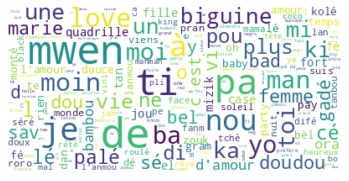

In [105]:
wordcl = WordCloud(background_color="white", max_font_size=50).generate(word_cloud_text)
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

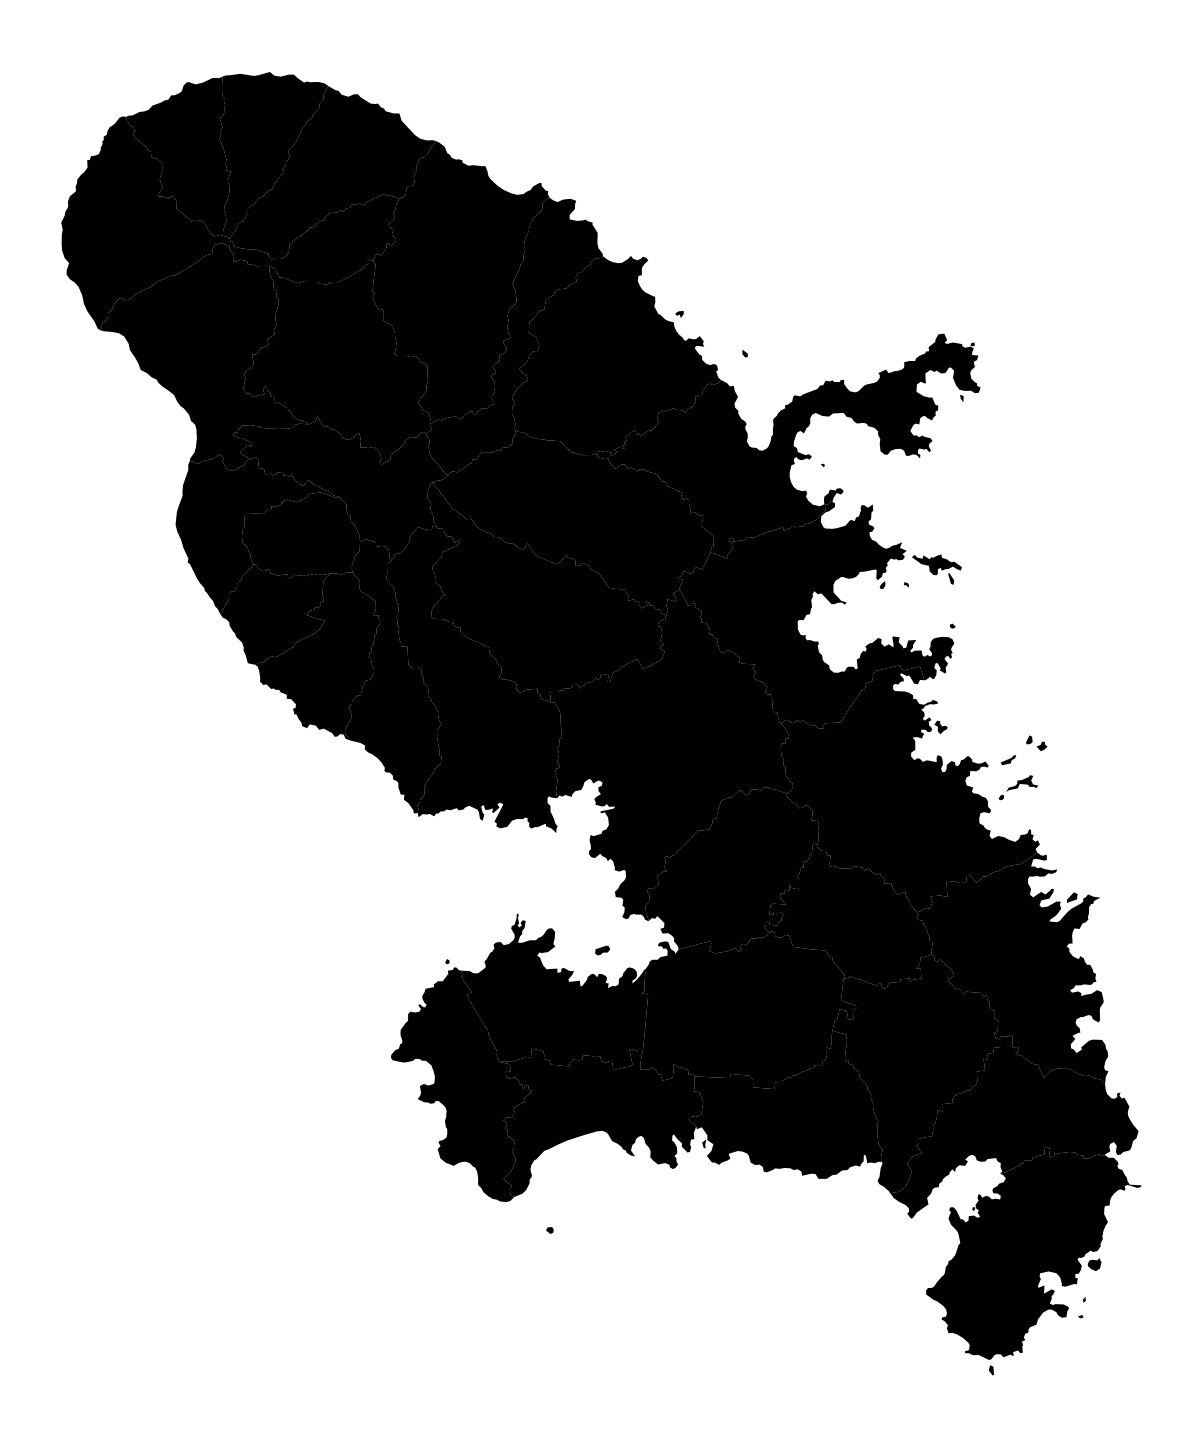

In [106]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(20, 20))
gdf_mq.plot(ax=ax, color="black")
_ = ax.axis('off')
fig.savefig('output-tmp/2022-11-27.png', facecolor='white')

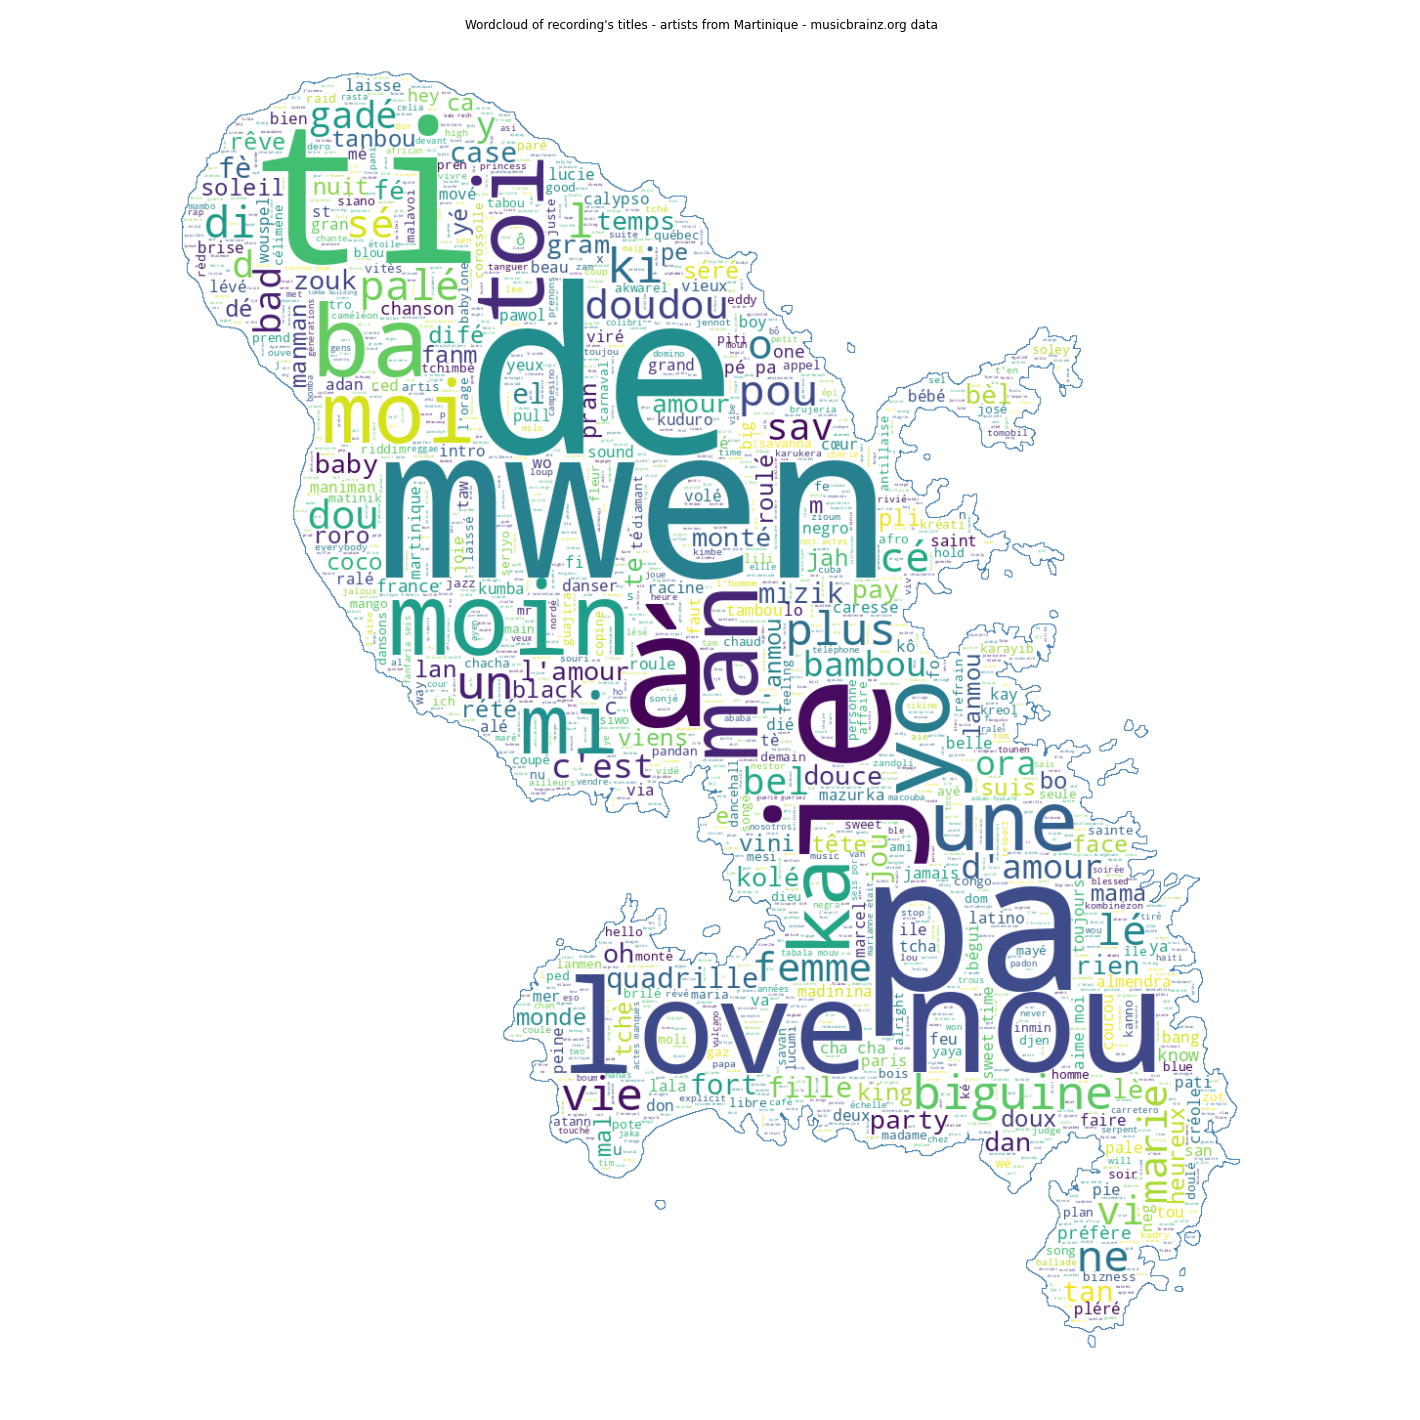

In [115]:
mask = np.array(Image.open("output-tmp/2022-11-27.png"))

wc = WordCloud(background_color='white', mask=mask, mode='RGB', 
              width=2000, max_words=2000, height=2000,
              random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(word_cloud_text)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
fig.suptitle("Wordcloud of recording's titles - artists from Martinique - musicbrainz.org data")

plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
ax.axis('off')

fig.savefig('output/2022-11-27.png', facecolor='white')